# Upload and process df

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/scantronReading_38.csv')

In [2]:
one_hot_encoded_df2.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,...,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.009665
2,44784,6,value_scantronReading,False,0.947277,False,False,False,True,False,...,False,False,True,False,False,False,0,0,0,0.934354
3,44807,7,value_scantronReading,True,1.014669,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,1.028650
4,44809,7,value_scantronReading,False,0.934665,False,False,False,False,True,...,False,False,True,False,False,False,0,0,0,0.949085


In [4]:
one_hot_encoded_df2.columns.tolist()

['studentId',
 'level',
 'dataSource',
 'is_proficient',
 'proficient_score',
 'course_AIDELIB7-8NC',
 'course_AIDSTU6-12NC',
 'course_ARTHIS7-8',
 'course_Advisory 5',
 'course_Advisory 6',
 'course_Advisory 7',
 'course_Advisory 7-8',
 'course_Advisory 8',
 'course_Aide Off 7-8',
 'course_BAND 6',
 'course_BAND 7 Brass',
 'course_BAND 7 Percu',
 'course_BAND 7 Wood',
 'course_BROADCAS 7-8',
 'course_Band 7',
 'course_Band7',
 'course_BandGuitar78',
 'course_CONTISSU 7-8',
 'course_CREAWRT 7-8',
 'course_CSElec Gr7-8',
 'course_CareerPrep-A',
 'course_CareerPrepA5',
 'course_CivicH/Adv 7',
 'course_CivicsGr 7',
 'course_ContIssu 7-8',
 'course_Drama 7-8',
 'course_ELA IntPK-6',
 'course_ELAGrPK5H/Ad',
 'course_ELAGrPK6H/Ad',
 'course_ENRICELA78',
 'course_ENRICMATH78',
 'course_ESLENRICH6-8',
 'course_ESLEnrich6-8',
 'course_Eng 7 H/Adv',
 'course_EngElec7-8',
 'course_EngIntrv7-12',
 'course_EngLang6',
 'course_English Gr 7',
 'course_English Gr 8',
 'course_English LA 5',
 'course_E

In [5]:
#drop ID and binary label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'is_proficient'])

In [6]:
one_hot_encoded_df2 = one_hot_encoded_df2[one_hot_encoded_df2['dataSource'] == 'value_scantronReading'].drop(columns=['dataSource'])

In [7]:
# Display all columns in the DataFrame and their null value counts
with pd.option_context('display.max_columns', None):  # Ensure all columns are shown
    print(one_hot_encoded_df2.info())  # Basic info
    print(one_hot_encoded_df2.isnull().sum())  # Null values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Columns: 139 entries, level to past_proficient_score
dtypes: bool(133), float64(2), int64(4)
memory usage: 3.5 MB
None
level                        0
proficient_score             0
course_AIDELIB7-8NC          0
course_AIDSTU6-12NC          0
course_ARTHIS7-8             0
                          ... 
school_Middle School F       0
iready_math                  0
iready_reading               0
bbb_literacy                 0
past_proficient_score     5280
Length: 139, dtype: int64


In [10]:
# Find columns with null values and print their names
null_columns = one_hot_encoded_df2.columns[one_hot_encoded_df2.isnull().any()]

# Print the columns that have null values
print(null_columns)


Index(['past_proficient_score'], dtype='object')


In [11]:
one_hot_encoded_df2.shape

(20460, 139)

In [12]:
one_hot_encoded_df2['past_proficient_score']

0        0.969279
1        1.009665
2        0.934354
3        1.028650
4        0.949085
           ...   
20455         NaN
20456         NaN
20457         NaN
20458         NaN
20459    0.870724
Name: past_proficient_score, Length: 20460, dtype: float64

In [13]:
#dropped na values
one_hot_encoded_df2 = one_hot_encoded_df2.dropna(subset=['past_proficient_score'])

In [14]:
one_hot_encoded_df2.shape

(15180, 139)

# Start of Modeling

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
# Step 1: Prepare the data
X = one_hot_encoded_df2.drop('proficient_score', axis=1)
y = one_hot_encoded_df2['proficient_score']


In [17]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Cross-Validated MSE (XGBoost): 0.00
[0]	train-rmse:0.10192	eval-rmse:0.10643
[1]	train-rmse:0.09552	eval-rmse:0.10041
[2]	train-rmse:0.08994	eval-rmse:0.09512
[3]	train-rmse:0.08513	eval-rmse:0.09065
[4]	train-rmse:0.08101	eval-rmse:0.08688
[5]	train-rmse:0.07749	eval-rmse:0.08367
[6]	train-rmse:0.07445	eval-rmse:0.08099
[7]	train-rmse:0.07184	eval-rmse:0.07871
[8]	train-rmse:0.06965	eval-rmse:0.07682
[9]	train-rmse:0.06776	eval-rmse:0.07526
[10]	train-rmse:0.06619	eval-rmse:0.07392
[11]	train-rmse:0.06486	eval-rmse:0.07287
[12]	train-rmse:0.06370	eval-rmse:0.07204
[13]	train-rmse:0.06273	eval-rmse:0.07129
[14]	train-rmse:0.06192	eval-rmse:0.07070
[15]	train-rmse:0.06127	eval-rmse:0.07018
[16]	train-rmse:0.06066	eval-rmse:0.06974
[17]	train-rmse:0.06016	eval-rmse:0.06943
[18]	train-rmse:0.05970	eval-rmse:0.06915
[19]	train-rmse:0.05933	eval-rmse:0.06890
[20]	train-rmse:0.05896	eval-rmse:0.06867
[21]	train-rmse:0.05864	eval-rmse:0.06849
[22]	train-rmse:0.05837	eval-rmse:0.06837
[23]	tra

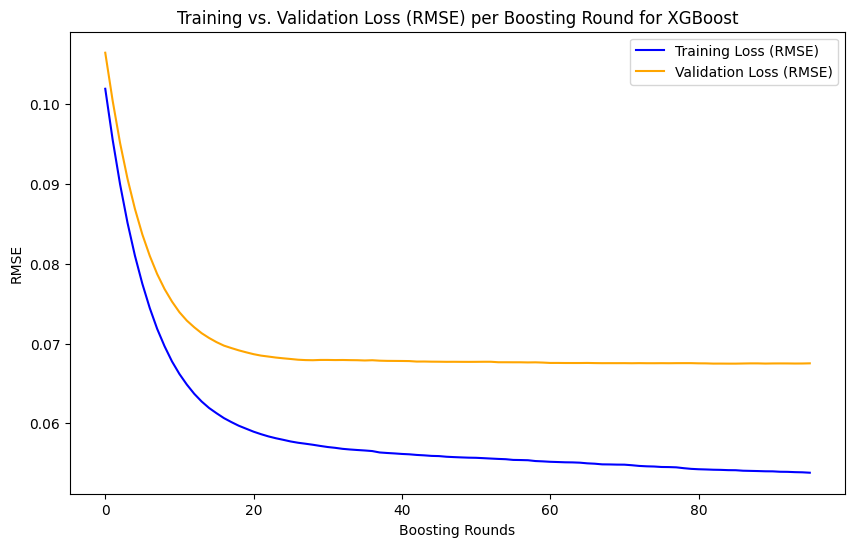

XGBoost - MSE: 0.00, R²: 0.65, RMSE: 0.07


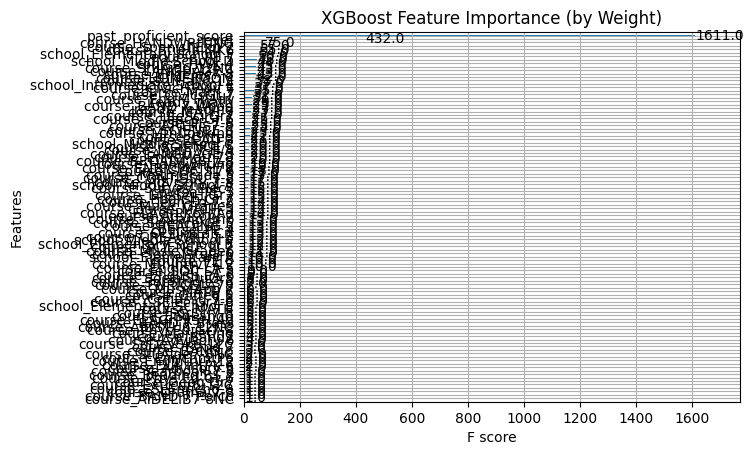

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1028110	test: 0.1070944	best: 0.1070944 (0)	total: 138ms	remaining: 1m 8s
50:	learn: 0.0623043	test: 0.0674185	best: 0.0674185 (50)	total: 379ms	remaining: 3.34s
100:	learn: 0.0605501	test: 0.0667561	best: 0.0667515 (99)	total: 579ms	remaining: 2.29s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.06666484598
bestIteration = 107

Shrink model to first 108 iterations.
CatBoost - MSE: 0.00, R²: 0.65, RMSE: 0.07


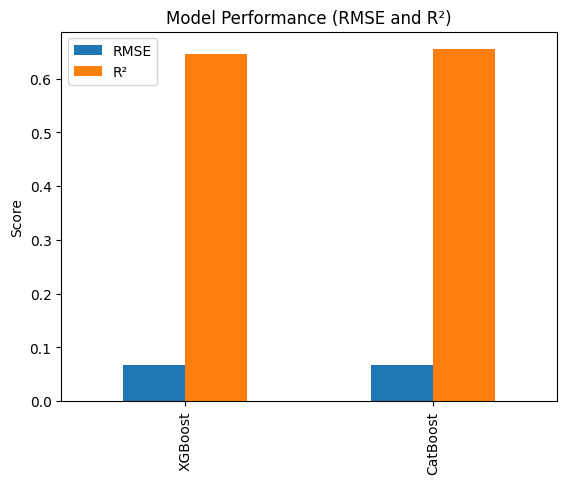

In [18]:
# Import required libraries
from xgboost import XGBRegressor, DMatrix, train, plot_importance
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import shap
import numpy as np
import matplotlib.pyplot as plt

# --- XGBoost Code ---

# Initialize XGBRegressor with regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation to estimate model performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE (XGBoost): {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for XGBoost training
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Evaluate both train and validation losses during training
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract losses from evals_result
train_loss_xgb = evals_result['train']['rmse']
validation_loss_xgb = evals_result['eval']['rmse']

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_xgb, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss_xgb, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round for XGBoost')
plt.legend()
plt.show()

# Make predictions and evaluate performance
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Feature importance plot for XGBoost
plot_importance(xgb_model_trained, importance_type='weight', title='XGBoost Feature Importance (by Weight)')
plt.show()

# --- CatBoost Code ---

# Identify categorical features and prepare data pools
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Initialize and train CatBoost with early stopping
catboost_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    eval_metric='RMSE',
    cat_features=categorical_features_indices
)

# Fit the model with early stopping and log evaluation metrics
catboost_model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10
)

# Make predictions and evaluate performance
catboost_y_pred = catboost_model.predict(X_test)
catboost_mse = mean_squared_error(y_test, catboost_y_pred)
catboost_r2 = r2_score(y_test, catboost_y_pred)
catboost_rmse = np.sqrt(catboost_mse)

print(f"CatBoost - MSE: {catboost_mse:.2f}, R²: {catboost_r2:.2f}, RMSE: {catboost_rmse:.2f}")

'''
# Feature importance plot for CatBoost
feature_importance = pd.DataFrame(catboost_model.get_feature_importance(prettified=True))
feature_importance.plot(kind='barh', title='CatBoost Feature Importance')
plt.show()
'''

# --- Additional Metrics Plot ---

# Compile and plot model performance metrics
metrics = {'RMSE': [xgb_rmse, catboost_rmse], 'R²': [xgb_r2, catboost_r2]}
df_metrics = pd.DataFrame(metrics, index=['XGBoost', 'CatBoost'])

df_metrics.plot(kind='bar', title="Model Performance (RMSE and R²)")
plt.ylabel("Score")
plt.show()



## feature importances/ correlations

In [27]:
import pandas as pd

# Step 9: Calculate feature importance
feature_importances = xgb_model_trained.get_score(importance_type='weight')

# Convert feature importance into a DataFrame
importance_df = pd.DataFrame(
    list(feature_importances.items()),
    columns=['Feature', 'Importance']
)

# Calculate correlation of each feature with the label
correlations = []
for feature in importance_df['Feature']:
    if feature in X.columns:  # Ensure the feature exists in the original dataset
        corr = X[feature].corr(y)  # Pearson correlation
        correlations.append(corr)
    else:
        correlations.append(None)  # Handle cases where feature names mismatch (if any)

# Add correlation to the DataFrame
importance_df['Correlation'] = correlations

# Add positive/negative correlation indication
importance_df['Correlation_Sign'] = importance_df['Correlation'].apply(
    lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral'
)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
importance_df[importance_df['Importance'] > 30].reset_index()





,index,Feature,Importance,Correlation,Correlation_Sign
0,105,past_proficient_score,1611.0,0.772682,Positive
1,0,level,432.0,0.039343,Positive
2,42,course_HANDWRITING,75.0,0.011376,Positive
3,86,course_SpanishExp 7,57.0,-0.021035,Negative
4,90,course_StuHallPK6,55.0,-0.161873,Negative
5,97,school_Elementary School F,54.0,-0.031261,Negative
6,67,course_PE 7,50.0,-0.027527,Negative
7,101,school_Middle School D,48.0,-0.014205,Negative
8,44,course_HWK-4,44.0,-0.018114,Negative
9,87,course_StuAid6-12NC,43.0,-0.043626,Negative


In [21]:
importance_df[importance_df['Correlation'] > 0.1]

,Feature,Importance,Correlation,Correlation_Sign
105,past_proficient_score,1611.0,0.772682,Positive


In [22]:
importance_df[importance_df['Correlation'] < -0.1]

,Feature,Importance,Correlation,Correlation_Sign
90,course_StuHallPK6,55.0,-0.161873,Negative


# partial depndence plot for 'level'

[0]	validation_0-rmse:0.10642
[1]	validation_0-rmse:0.10037
[2]	validation_0-rmse:0.09520
[3]	validation_0-rmse:0.09073
[4]	validation_0-rmse:0.08698
[5]	validation_0-rmse:0.08381
[6]	validation_0-rmse:0.08113
[7]	validation_0-rmse:0.07884
[8]	validation_0-rmse:0.07696
[9]	validation_0-rmse:0.07542
[10]	validation_0-rmse:0.07417
[11]	validation_0-rmse:0.07308
[12]	validation_0-rmse:0.07227
[13]	validation_0-rmse:0.07156
[14]	validation_0-rmse:0.07092
[15]	validation_0-rmse:0.07039
[16]	validation_0-rmse:0.07003
[17]	validation_0-rmse:0.06969
[18]	validation_0-rmse:0.06939
[19]	validation_0-rmse:0.06919
[20]	validation_0-rmse:0.06891
[21]	validation_0-rmse:0.06878
[22]	validation_0-rmse:0.06858
[23]	validation_0-rmse:0.06846
[24]	validation_0-rmse:0.06834
[25]	validation_0-rmse:0.06823
[26]	validation_0-rmse:0.06820
[27]	validation_0-rmse:0.06808
[28]	validation_0-rmse:0.06806
[29]	validation_0-rmse:0.06804
[30]	validation_0-rmse:0.06800
[31]	validation_0-rmse:0.06799
[32]	validation_0-

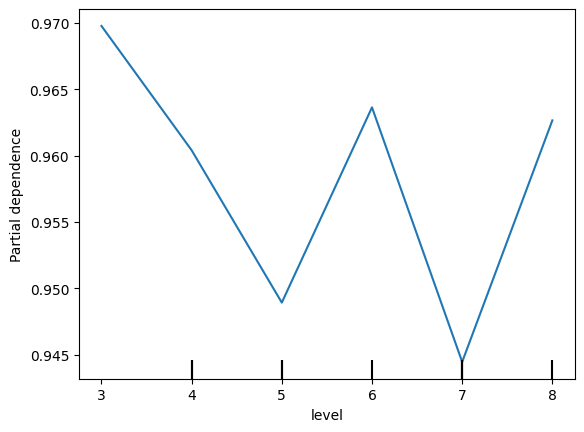

In [25]:
from sklearn.inspection import PartialDependenceDisplay
# Fit the model using XGBRegressor
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# PDP: Plot Partial Dependence for a specific feature
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(xgb_model, X_train, ['level'])
plt.show()


